# **Training Colab**

This Colab serves for model training.
For it to work, a folder called `battery_soh` must be created on google drive and include another folder called `Battery_SOH_` + the date of the most current version (`day_month`). This `Battery_SOH` should contain all of the necessary files (`Pytorch_Dataset.py`, `Training.py`, `NN_Classes.py`, `Nasa_Classes.py` and the dataset files).

An example can be found in the following google drive link (you'll need to ask for access):
https://drive.google.com/drive/folders/1G5xLrXHlKq3QpOzaFGusB89_erZPYwa6?usp=sharing 



The following cell includes the bare minimum to mount google drive to google colab so that the files can be directly called. The `root_path` may have to be updated to the latest `Battery_SOH` folder.

In [1]:
from google.colab import drive
import os
import torch as th

# Mounting google drivee
drive.mount('/content/gdrive')
folder_name = 'Battery_SOH_02_06_14h'
# The root path will change depending on the latest 'bakcup'
root_path = 'gdrive/My Drive/battery_soh/'+folder_name 
os.chdir(root_path)
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
device

Mounted at /content/gdrive


device(type='cpu')

The cell should output something like:
```
Mounted at /content/gdrive
device(type='cuda', index=0)
```

If the second line says `device(type='cpu')` then you should change your environment options above for GPU for faster results.

In [2]:
!pip install PyAstronomy
from FFNN import *
from torch.utils.data import DataLoader
from Training import *
import re
from datetime import datetime

     |████████████████████████████████| 716kB 5.1MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504499 sha256=e1bcfd41f2fa96cb0e4e975093ded427150a9b26d61f1e35eb6fdb6858a763e4
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built PyAstronomy


In [ ]:
#os.chdir('../')
#os.listdir()

In [13]:
os.chdir('.//Datasets/NASA/B. Saha and K Goebel')
os.chdir('.//Separate_pickles')

In [4]:
Nb_clusters = 80

In [5]:
# K-MEANS:
try:  # If a K-means clustering has already been done with
    # that number of clusters:
    with open('kmeans' + str(Nb_clusters) + '.txt', 'rb') as f:
        kmeans = pickle.load(f)
except FileNotFoundError:  # If not:

    # Opening the complete, clean, IVT data:
    with open('IVT_Data.txt', 'rb') as f:
        IVT = pickle.load(f)
    IVT = IVT.detach().numpy()  # Converting to numpy

    # The actual kmeans clustering:
    print('Starting k-means...')
    start = time.time()
    kmeans = KMeans(n_clusters=Nb_clusters).fit(IVT)
    end = time.time()
    print('Finished: ' + str(Nb_clusters) +
            ' cluster k-means in ' + str(end - start) + ' seconds')

    # Saving the class:
    with open('kmeans' + str(Nb_clusters) + '.txt', 'wb') as f:
        pickle.dump(kmeans, f)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
batch_size = 1
mean_hist=True
norm_type = 'zscore'
resampling = True
fixed_len = 150

In [16]:
files = os.listdir()  # All files in the folder
file_list = []  # List with the valid files
for file_name in files:
    match = re.search(r'B\d{4}.txt', file_name)  # Only take into acount
    # the battery files
    if match == None:
        continue
    else:
        file_list.append(file_name)
file_list.sort()


# Files to be ignored:
ignore = ['B0049.txt', 'B0050.txt', 'B0051.txt', 'B0052.txt',
          'B0025.txt', 'B0026.txt', 'B0027.txt', 'B0028.txt',
          'B0029.txt', 'B0030.txt', 'B0031.txt', 'B0032.txt',
          'B0038.txt', 'B0039.txt', 'B0040.txt']


train = ['B0034.txt', 'B0036.txt',
         'B0007.txt', 'B0018.txt',
         'B0045.txt', 'B0046.txt',
         'B0053.txt', 'B0054.txt']


# with open('train_dataset_FFNN_'+norm_name+'.txt', 'rb') as f:
#     train_dataset, valid_dataset = pickle.load(f)

# Training files:
Train_list = []
for file_name in file_list:
    if file_name in train:
        with open(file_name, 'rb') as f:
            Battery = pickle.load(f)
        Train_list.append(Battery)

# Creating the dataset:
train_dataset = Torch_Dataset_KMEANS(Train_list, Nb_clusters, kmeans=kmeans,
                                     print_bool=True, norm_type=norm_type,
                                     mean_hist=mean_hist, resampling=resampling,
                                     fixed_len=fixed_len)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

sim_train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=False, num_workers=0)

# Validation files:
Valid_list = []
for file_name in file_list:
    if (file_name not in train) and (file_name not in ignore):
        with open(file_name, 'rb') as f:
            Battery = pickle.load(f)
        Valid_list.append(Battery)

valid_dataset = Torch_Dataset_KMEANS(Valid_list, Nb_clusters, kmeans=kmeans,
                                     print_bool=True, norm=train_dataset.norm,
                                     mean_hist=mean_hist, resampling=resampling,
                                     fixed_len=fixed_len)

# with open('train_dataset_FFNN_'+norm_name+'_'+str(batch_size)+'.txt', 'wb') as f:
#     pickle.dump((train_dataset, valid_dataset), f)

valid_loader = DataLoader(dataset=valid_dataset, batch_size=len(valid_dataset), shuffle=False, num_workers=0)

B0007
B0018
B0034
B0036
B0045
B0046
B0053
B0054
973
B0005
B0006
B0033
B0041
B0042
B0043
B0044
B0047
B0048
B0055
B0056
1052


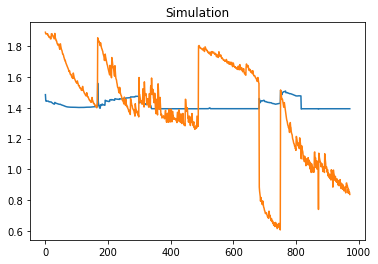

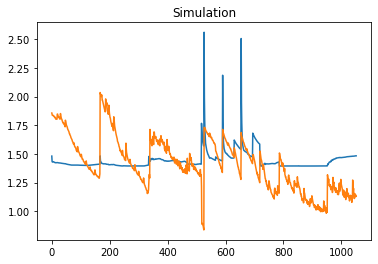

In [18]:
HIDDEN_DIM = 80
DROPOUT = 0
Nb_Epochs = 500
Learning_Rate = 0.5*1e-5

Model = FFNN_v1(Nb_clusters, HIDDEN_DIM, drop_out=DROPOUT, norm=train_dataset.norm,
                mean_hist = train_dataset.mean_hist)

simulate(sim_train_loader, Model, block=False, denormalize=True)
simulate(valid_loader, Model, block=False, denormalize=True)

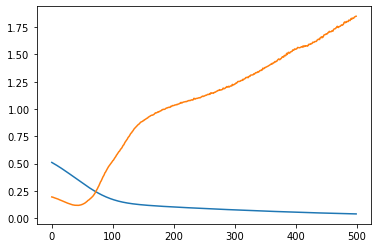

Best validation error:  42


In [24]:
if os.getcwd() == '/content/gdrive/My Drive/battery_soh/'+folder_name+'/Datasets/NASA/B. Saha and K Goebel/Separate_pickles':
    os.chdir('../../../../')
elif os.getcwd() != '/content/gdrive/My Drive/battery_soh/'+folder_name:
    print(os.listdir())
    raise Exception('Folder problem')

Train_info, _ , _ = Train(train_loader, valid_loader, Model, Nb_Epochs, plot_bool=True, LR=Learning_Rate, report=True,
                          sim_loader=sim_train_loader, print_bool=False)


os.chdir('.//Datasets/NASA/B. Saha and K Goebel')
os.chdir('.//Separate_pickles')

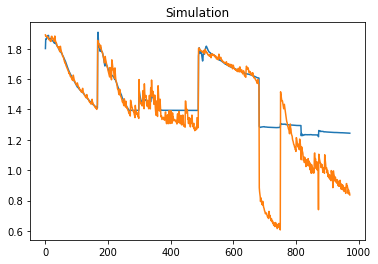

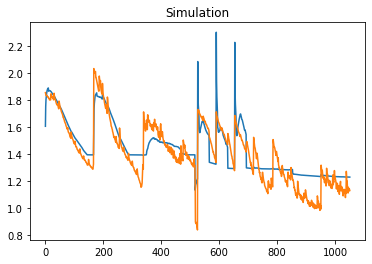

In [25]:
# Best model
simulate(sim_train_loader, Model, block=False, denormalize=True)
simulate(valid_loader, Model, block=False, denormalize=True)

In [26]:
if os.getcwd() == '/content/gdrive/My Drive/battery_soh/'+folder_name+'/Datasets/NASA/B. Saha and K Goebel/Separate_pickles':
    os.chdir('../../../../')
    os.chdir('.//Reports')
elif os.getcwd() != '/content/gdrive/My Drive/battery_soh/'+folder_name+'/Reports':
    print(os.listdir())
    raise Exception('Folder problem')

file_name = input("Report folder: ")
file_name = file_name.replace('/', ':')
os.chdir('.//'+str(file_name))

Train_info = pickle.load(open('Training_Info.txt', 'rb'))

try:
    with open('base_model.txt', 'rb') as f:
        Model = pickle.load(f)

except FileNotFoundError:
    print('problem')

os.chdir('../../')
os.chdir('.//Datasets/NASA/B. Saha and K Goebel')
os.chdir('.//Separate_pickles')

Report folder: 2021-06-02 15:14:07.099891


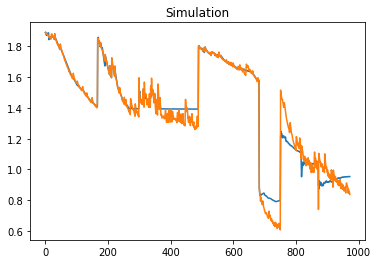

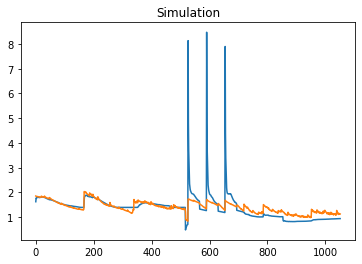

In [27]:
# Last_model
simulate(sim_train_loader, Model, block=False, denormalize=True)
simulate(valid_loader, Model, block=False, denormalize=True)

B0005.txt


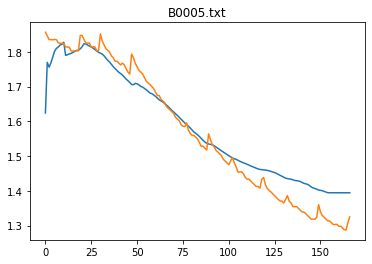

B0006.txt


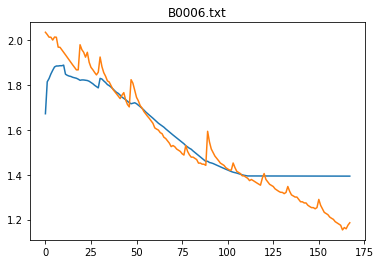

B0007.txt  (used in training)


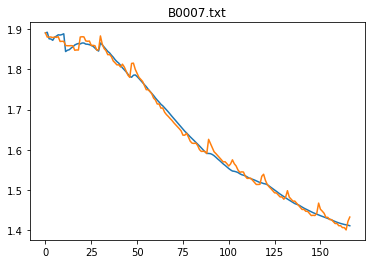

B0018.txt  (used in training)


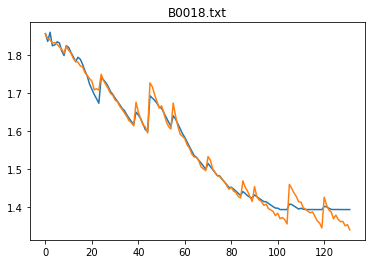

B0033.txt


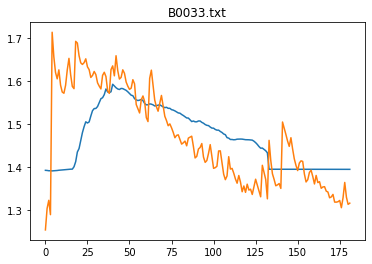

B0034.txt  (used in training)


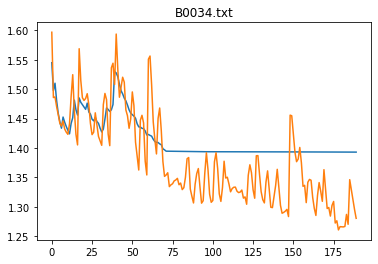

B0036.txt  (used in training)


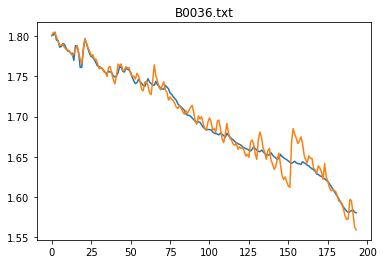

B0041.txt


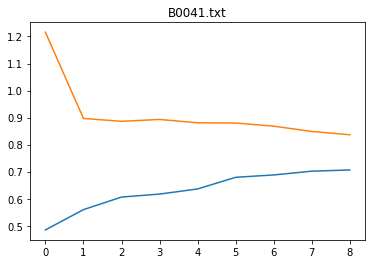

B0042.txt


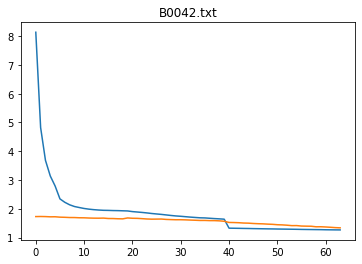

B0043.txt


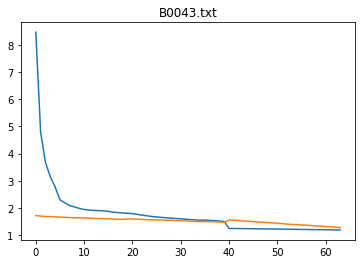

B0044.txt


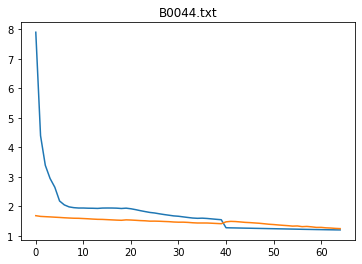

B0045.txt  (used in training)


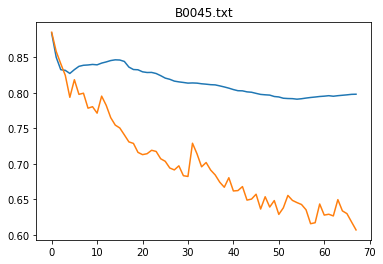

B0046.txt  (used in training)


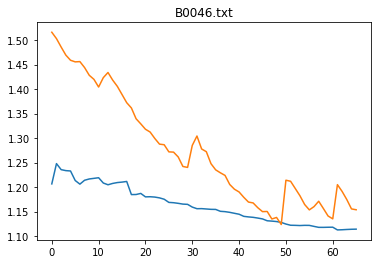

B0047.txt


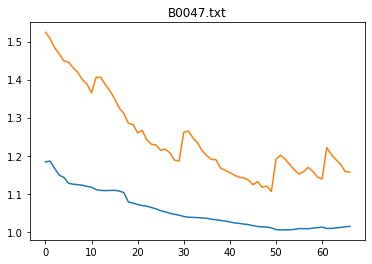

B0048.txt


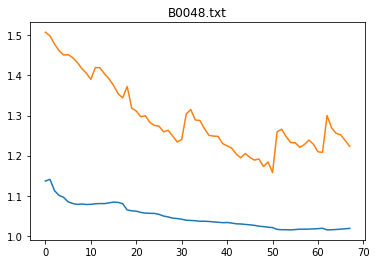

B0053.txt  (used in training)


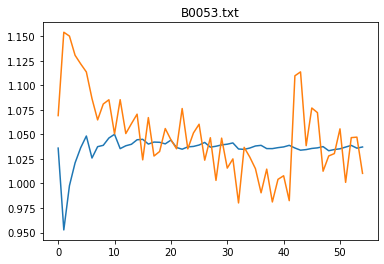

B0054.txt  (used in training)


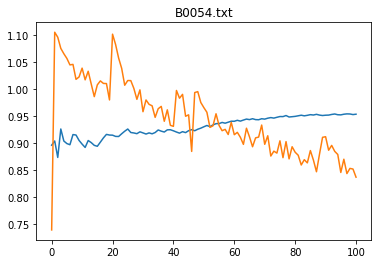

B0055.txt


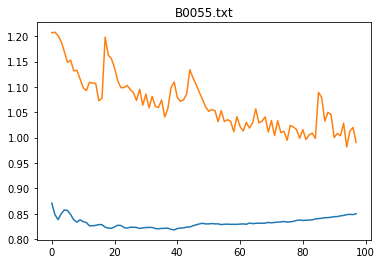

B0056.txt


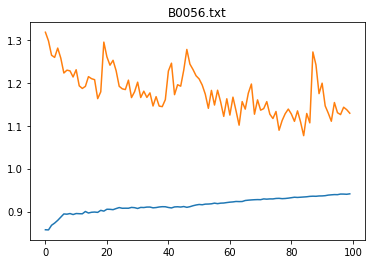

In [28]:
#Name_list = [str(Battery.Name)+'.txt' for Battery in Train_list]
Name_list = train

ignore2 = ['B0049.txt', 'B0050.txt', 'B0051.txt', 'B0052.txt']

for file_name in file_list:
    if file_name in ignore:
        continue
    if file_name in Name_list:
        print(file_name, ' (used in training)')
    else:
        print(file_name)
    with open(file_name, 'rb') as f:
        Battery = pickle.load(f)

    Battery_list = [Battery]
    th_B = Torch_Dataset_KMEANS(Battery_list, Nb_clusters, kmeans=kmeans,
                                print_bool=False, norm=train_dataset.norm,
                                mean_hist = train_dataset.mean_hist, fixed_len=fixed_len,
                                resampling=resampling)

    B_ld = DataLoader(dataset=th_B, batch_size=len(th_B), shuffle=False, num_workers=0)
    simulate(B_ld, Model, title = file_name)

In [ ]:
os.chdir('.//' + date)  # Entrando nele
# Loading the best epoch:
os.chdir('.//Epochs')
Best_Epoch_nb = (Training_info.best_epoch.nb+1)
Model.load_state_dict(th.load('Epoch_'+str(Best_Epoch_nb)+'.txt'))
os.chdir('../')
th.save(Model.state_dict(), 'FFNN_v1_Best_Epoch.txt')
os.chdir('../')
# os.listdir()

['B0047.txt',
 'B0050.txt',
 'B0045.txt',
 'B0053.txt',
 'B0052.txt',
 'B0051.txt',
 'B0044.txt',
 'B0046.txt',
 'B0055.txt',
 'B0041.txt',
 'B0054.txt',
 'B0040.txt',
 'B0030.txt',
 'B0043.txt',
 'B0056.txt',
 'B0042.txt',
 'B0025.txt',
 'B0033.txt',
 'B0031.txt',
 'B0026.txt',
 'B0018.txt',
 'B0027.txt',
 'B0032.txt',
 'B0036.txt',
 'B0034.txt',
 'B0005.txt',
 'B0039.txt',
 'B0038.txt',
 'B0006.txt',
 'B0049.txt',
 'B0028.txt',
 'B0007.txt',
 'B0029.txt',
 'B0048.txt',
 'IVT_Data.txt',
 'kmeans80.txt',
 'train_dataset_FFNN.txt',
 'train_dataset_FFNN2.txt',
 'train_dataset_FFNN3_minmax.txt',
 '.DS_Store',
 'train_dataset_FFNN_zscore.txt',
 '2021-06-01 10:34:42.291632',
 '2021-06-01 10:33:15.597767',
 '2021-06-01 10:35:10.858734',
 '2021-06-01 10:30:45.544264',
 'Epochs_LSTM_5',
 '2021-06-01 11:06:17.899235',
 '2021-06-01 10:58:31.278875',
 'train_dataset_FFNN_norm_minmax.txt',
 '2021-06-01 11:36:14.761573',
 'train_dataset_FFNN_minmax.txt',
 '2021-06-01 12:44:03.177432',
 '2021-06-01 

B0005.txt


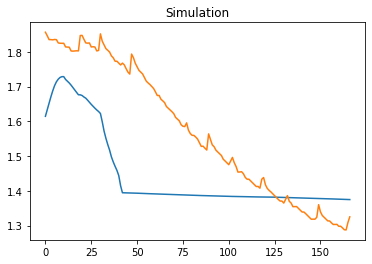

B0006.txt


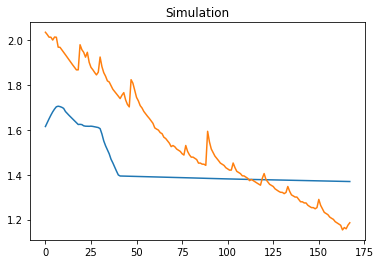

B0007.txt  (used in training)


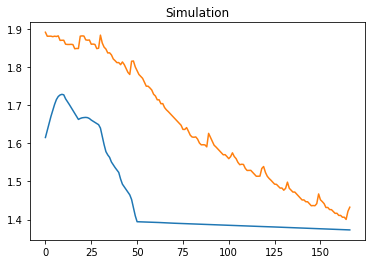

B0018.txt  (used in training)


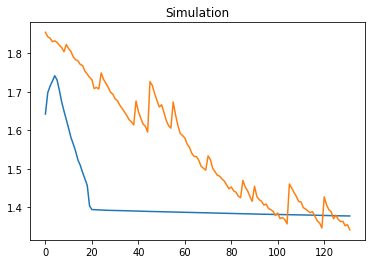

B0033.txt


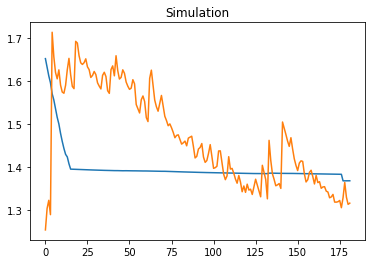

B0034.txt  (used in training)


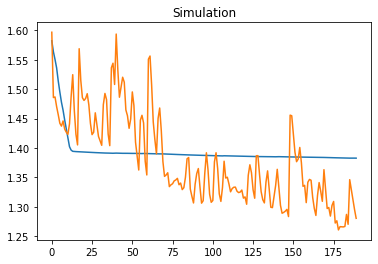

B0036.txt  (used in training)


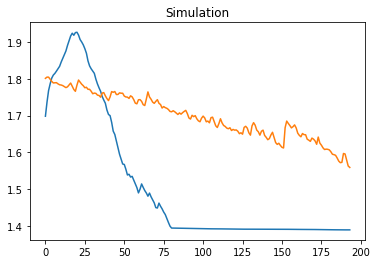

B0041.txt


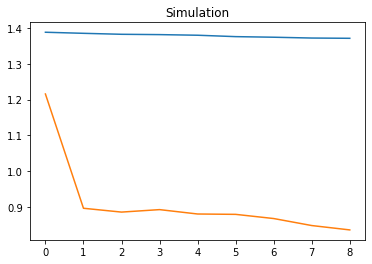

B0042.txt


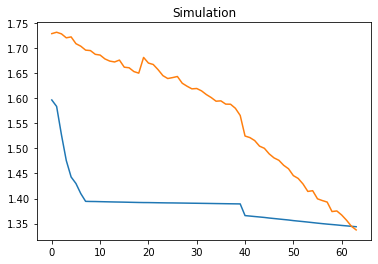

B0043.txt


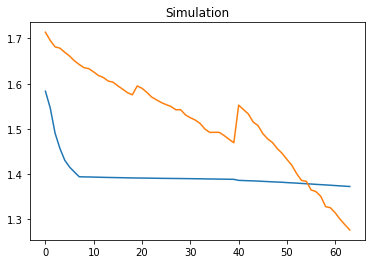

B0044.txt


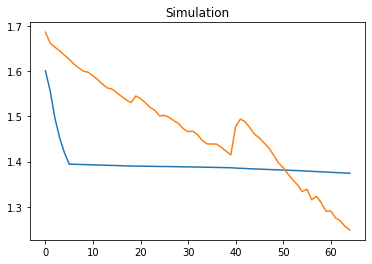

B0045.txt  (used in training)


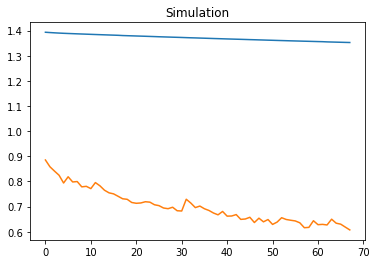

B0046.txt  (used in training)


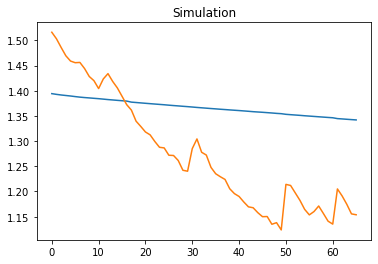

B0047.txt


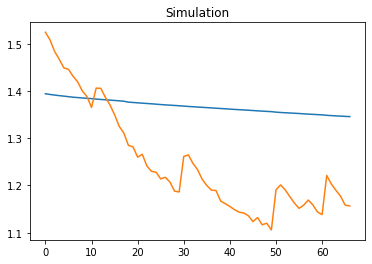

B0048.txt


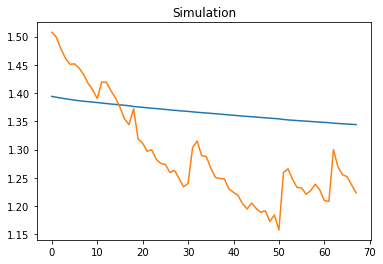

B0053.txt  (used in training)


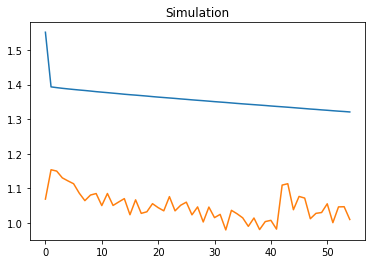

B0054.txt  (used in training)


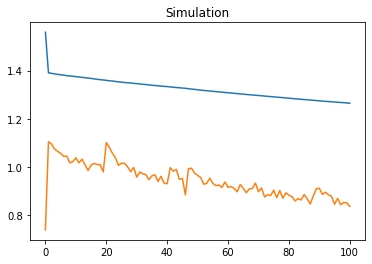

B0055.txt


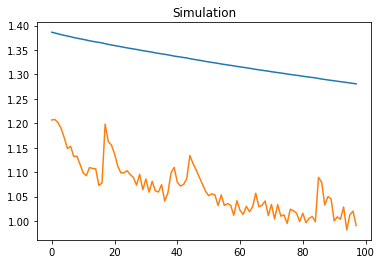

B0056.txt


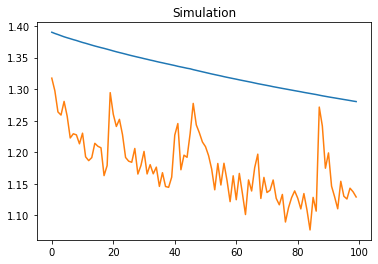

In [ ]:
#Name_list = [str(Battery.Name)+'.txt' for Battery in Train_list]
Name_list = train
for file_name in file_list:
    if file_name in ignore:
        continue
    if file_name in Name_list:
        print(file_name, ' (used in training)')
    else:
        print(file_name)
    with open(file_name, 'rb') as f:
        Battery = pickle.load(f)

    Battery_list = [Battery]
    th_B = Torch_Dataset_KMEANS(Battery_list, Nb_clusters, kmeans=kmeans,
                                print_bool=False, norm=train_dataset.norm,
                                mean_hist = train_dataset.mean_hist)
    # th_B = Torch_Dataset_KMEANS(Battery_list, Nb_clusters, kmeans=kmeans,
    #                         print_bool=False)
    # plt.plot(th_B.output)
    # plt.show()
    B_ld = DataLoader(dataset=th_B, batch_size=len(th_B), shuffle=False, num_workers=0)
    simulate(B_ld, Model)

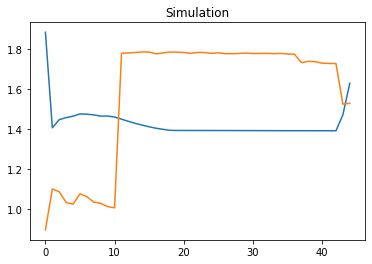

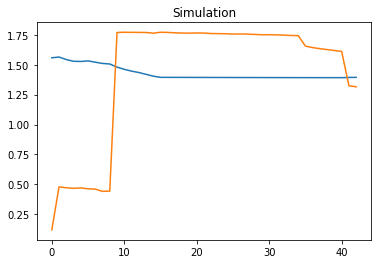

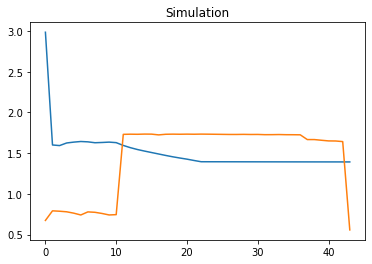

In [ ]:
list_run = ['B0038.txt', 'B0039.txt', 'B0040.txt']

for file_name in list_run:
    with open(file_name, 'rb') as f:
        Battery = pickle.load(f)

    Battery_list = [Battery]
    th_B = Torch_Dataset_KMEANS(Battery_list, Nb_clusters, kmeans=kmeans,
                                print_bool=False, norm=train_dataset.norm,
                                mean_hist = train_dataset.mean_hist)
    # th_B = Torch_Dataset_KMEANS(Battery_list, Nb_clusters, kmeans=kmeans,
    #                         print_bool=False)
    # plt.plot(th_B.output)
    # plt.show()
    B_ld = DataLoader(dataset=th_B, batch_size=len(th_B), shuffle=False, num_workers=0)
    simulate(B_ld, Model)